In [1]:
## ** ML Model for fall prediction**
import pandas as pd
df = pd.read_csv('/kaggle/input/elderly-fall-prediction-and-detection/cStick.csv')
df

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [2]:
## Data separation as X and Y
y = df ['Accelerometer']
y


0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
2034    1.0
2035    1.0
2036    1.0
2037    1.0
2038    0.0
Name: Accelerometer, Length: 2039, dtype: float64

In [3]:
x = df.drop('Accelerometer', axis=1)
x

,Distance,Pressure,HRV,Sugar level,SpO2,Decision
0,25.540,1.0,101.396,61.080,87.770,1
1,2.595,2.0,110.190,20.207,65.190,2
2,68.067,0.0,87.412,79.345,99.345,0
3,13.090,1.0,92.266,36.180,81.545,1
4,69.430,0.0,89.480,80.000,99.990,0
...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,2
2035,9.660,2.0,124.320,177.995,79.320,2
2036,15.220,1.0,93.828,40.440,82.610,1
2037,9.120,2.0,123.240,175.871,78.240,2


In [4]:
## Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [5]:
x_train


,Distance,Pressure,HRV,Sugar level,SpO2,Decision
1353,58.642,0.0,73.112,74.470,94.470,0
723,55.539,0.0,68.404,72.865,92.865,0
2005,7.725,2.0,120.450,170.384,75.450,2
372,9.435,2.0,123.870,177.110,78.870,2
737,8.820,2.0,122.640,174.691,77.640,2
...,...,...,...,...,...,...
1879,1.830,2.0,108.660,17.198,63.660,2
1895,9.195,2.0,123.390,176.166,78.390,2
1859,61.571,0.0,77.556,75.985,95.985,0
792,2.760,2.0,110.520,20.856,65.520,2


In [6]:
x_test

,Distance,Pressure,HRV,Sugar level,SpO2,Decision
321,20.500,1.0,97.700,51.000,85.250,1
1875,1.035,2.0,107.070,14.071,62.070,2
1933,50.812,0.0,61.232,70.420,90.420,0
270,26.710,1.0,102.254,63.420,88.355,1
1991,13.450,1.0,92.530,36.900,81.725,1
...,...,...,...,...,...,...
29,2.430,2.0,109.860,19.558,64.860,2
1874,7.365,2.0,119.730,168.968,74.730,2
1168,28.000,1.0,103.200,66.000,89.000,1
2017,51.914,0.0,62.904,70.990,90.990,0


In [7]:
## model building
##**Linear regression**
##**Training the model**
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [8]:
##**Applying the model to make a prediction**
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
print(y_lr_train_pred)

[ 0.00388484 -0.00272733  1.01024904 ...  0.01012623  1.01702779
  1.06764532]


In [9]:
y_lr_test_pred

array([ 9.84389938e-01,  9.45731492e-01, -1.28000836e-02,  9.27699596e-01,
        1.04874854e+00,  1.82215107e-02,  2.53898473e-02,  8.99729894e-01,
        1.04327121e+00,  1.49463225e-02,  1.15281378e-04,  1.01287204e+00,
        1.05426675e+00, -5.87893107e-03,  2.64403793e-02,  5.34853739e-05,
        1.04222145e-03,  1.27216663e-02,  9.30164394e-01,  1.06107253e+00,
        1.06846692e+00,  1.01013338e+00,  1.05236595e+00,  6.54206586e-03,
        9.43857713e-01, -9.21591532e-03,  1.00962907e+00,  9.45772386e-01,
        9.38911846e-01,  1.25362783e-02,  1.24744823e-02,  1.05674662e+00,
        1.02498261e-02,  1.32778304e-02,  9.53831967e-01,  1.02136756e+00,
        1.07654470e+00,  9.01956156e-01,  2.58842153e-02,  9.32288607e-03,
        9.44953179e-01,  1.03116221e-02, -5.69354306e-03,  9.65219291e-01,
        1.07592473e+00,  5.42973778e-03,  1.05732569e+00, -1.22439195e-02,
        1.01640782e+00,  1.07640904e+00,  1.09142392e+00, -1.35416356e-02,
       -4.51941897e-03,  

In [10]:
##**Evaluate model prefromance**
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [11]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 0.0022094535466156908
LR R2 (Train): 0.9901664678667914
LR MSE (Test): 0.0024818496055339662
LR R2 (Test): 0.9887477227166466


In [12]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse,lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.002209,0.990166,0.002482,0.988748


In [13]:
##**Random Forest**
##**Training the model**
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [14]:
##**Applying the model to make a prediction**
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [15]:
##**Evaluate model prefromance**
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [16]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse,rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.000002,0.99999,0.0,1.0


In [17]:
##**Model Comparison**
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.002209,0.990166,0.002482,0.988748
1,Random forest,0.000002,0.99999,0.0,1.0


Text(0.5, 0, 'Experimental Accelerometer')

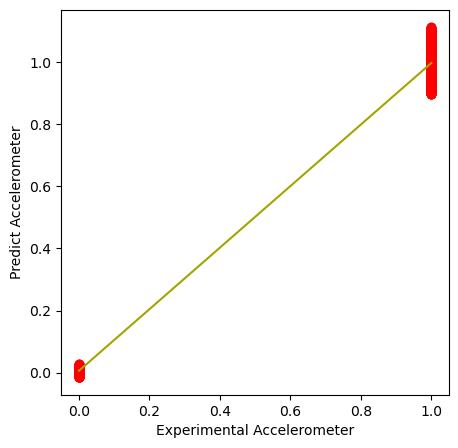

In [18]:
##**Data visualiztion of prediction results**
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#FF0000")

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#A3A500')
plt.ylabel('Predict Accelerometer')
plt.xlabel('Experimental Accelerometer')